In [1]:
import pandas as pd
dataset = pd.read_csv("Live.csv")
dataset.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0


In [3]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)

In [4]:
model.fit(dataset)

KMeans(n_clusters=3)

In [5]:
labels = model.predict(dataset)

In [6]:
import numpy as np
np.unique(labels, return_counts=True)

(array([0, 1, 2], dtype=int32), array([4288, 2334,  428]))

For n_clusters=2, The Silhouette Coefficient is 0.8188237721696822
For n_clusters=3, The Silhouette Coefficient is 0.8972493682244883
For n_clusters=4, The Silhouette Coefficient is 0.9106664962327088
For n_clusters=5, The Silhouette Coefficient is 0.8866768371183754
For n_clusters=6, The Silhouette Coefficient is 0.8430118288915796
For n_clusters=7, The Silhouette Coefficient is 0.8419421782294257
For n_clusters=8, The Silhouette Coefficient is 0.8370052625268489
For n_clusters=9, The Silhouette Coefficient is 0.7601572678628534
For n_clusters=10, The Silhouette Coefficient is 0.7282336980248312
For n_clusters=11, The Silhouette Coefficient is 0.7156211362553957


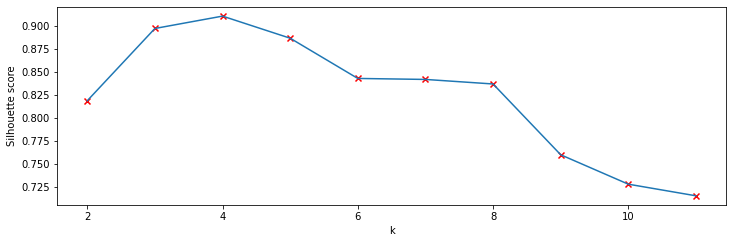

In [7]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouettes = []
ks = list(range(2, 12))
for n_cluster in ks:
    kmeans = KMeans(n_clusters=n_cluster).fit(dataset)
    label = kmeans.labels_
    sil_coeff = silhouette_score(dataset, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    silhouettes.append(sil_coeff)

plt.figure(figsize=(12, 8))    
plt.subplot(211)
plt.scatter(ks, silhouettes, marker='x', c='r')
plt.plot(ks, silhouettes)
plt.xlabel('k')
plt.ylabel('Silhouette score');

In [8]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit(dataset)
labels = model.predict(dataset)
import numpy as np
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([2334, 4288,  365,   63]))

In [9]:
dataset["labels"] = labels
dataset

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video,labels
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0,0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0,0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1
7046,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0,0.0,1.0,0.0,0.0,1
7047,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1
7048,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1


In [ ]:
group_zero = dataset[dataset["labels"]==0]["num_comments"].mean()
group_zero

0.030608773182480085

In [ ]:
group_one = dataset[dataset["labels"]==1]["num_comments"].mean()
group_one

0.0007619566531325929

In [ ]:
group_two = dataset[dataset["labels"]==2]["num_comments"].mean()
group_two

0.001726458130747155

In [ ]:
group_three = dataset[dataset["labels"]==3]["num_comments"].mean()
group_three

0.00027148226290672734

____

In [ ]:
group_zero = dataset[dataset["labels"]==0]["num_shares"].mean()
group_zero

0.03378503171323544

In [ ]:
group_one = dataset[dataset["labels"]==1]["num_shares"].mean()
group_one

0.000745873618182425

In [ ]:
group_two = dataset[dataset["labels"]==2]["num_shares"].mean()
group_two

0.0007473434899500516

In [ ]:
group_three = dataset[dataset["labels"]==3]["num_shares"].mean()
group_three

0.001284119566829823

In [ ]:
status_type = dataset[["status_type_photo", "status_type_video", "status_type_status"]].idxmax(axis=1)
dataset = pd.concat([dataset["labels"],status_type.rename("status_type")], axis=1)

In [ ]:
dataset.groupby(["labels","status_type"])["status_type"].count()

labels  status_type       
0       status_type_video     2334
1       status_type_photo     4288
2       status_type_status     365
3       status_type_photo       63
Name: status_type, dtype: int64